In [2]:
# 匯入套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
plt.style.use('ggplot')  # 設定專業圖表風格

# 讀取資料
data = pd.read_csv('sprinters.csv')

# 檢查資料中的缺失值
print(data.isnull().sum())

# 計算步幅身高比
df = pd.DataFrame(data)
df['stride_length_per_height'] = df['stride_length_m'] / df['height_m'] 
# 將步幅身高比四捨五入到小數點後兩位
df['stride_length_per_height'] = df['stride_length_per_height'].round(2)

df

name                   0
height_m               0
best_time              0
stride_length_m        0
stride_frequency_hz    0
country                0
dtype: int64


,name,height_m,best_time,stride_length_m,stride_frequency_hz,country,stride_length_per_height
0,Usain Bolt,1.96,9.58,2.44,4.30,JAM,1.24
1,Tyson Gay,1.78,9.69,2.35,4.80,USA,1.32
2,Asafa Powell,1.88,9.72,2.40,4.60,JAM,1.28
3,Su Bingtian,1.72,9.83,2.15,4.90,CHN,1.25
4,Christian Coleman,1.75,9.76,2.20,5.00,USA,1.26
5,Fred Kerley,1.91,9.76,2.35,4.60,USA,1.23
6,Yohan Blake,1.80,9.69,2.30,4.80,JAM,1.28
7,Ferdinand Omanyala,1.72,9.77,2.18,4.90,KEN,1.27
8,Trayvon Bromell,1.78,9.77,2.25,4.70,USA,1.26
9,Yoshihide Kiryu,1.78,9.98,2.15,4.80,JPN,1.21


  country  count
0      AU      2
1     CHN      5
2     FRA      2
3     ITA      2
4     JAM      5
5     JPN      5
6     KEN      1
7      UK      2
8     USA      7


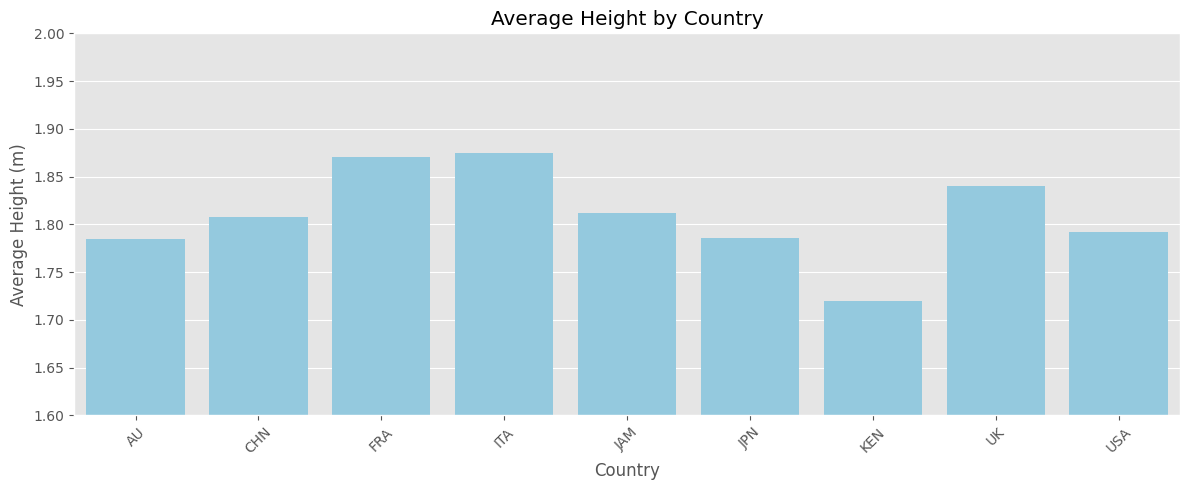

In [3]:
# 統計各國頂尖百米運動員人數
country_count_df = df.groupby('country').size().reset_index(name='count')
print(country_count_df)

# 計算各國平均身高
average_height_df = df.groupby('country', as_index=False)['height_m'].mean()
average_height_df.columns = ['country', 'average_height']

# 繪製長條圖，並設定圖片大小
plt.figure(figsize=(12, 5))
sns.barplot(data=average_height_df, x='country', y='average_height', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Average Height (m)')
plt.title('Average Height by Country')
plt.xticks(rotation=45)

# 調整 y 軸刻度範圍
plt.ylim(1.60, 2.00)  
plt.tight_layout()

plt.show()

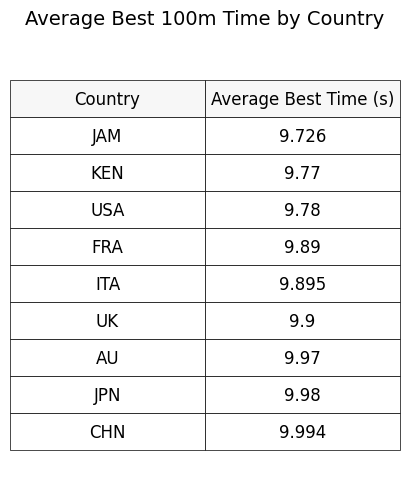

In [10]:
# 計算各國頂尖選手「最佳成績」的平均值，並按平均值排序
country_mean_times = df.groupby('country')['best_time'].mean().round(3).sort_values()

# 將各國最佳成績平均值轉換為表格顯示
country_mean_times_df = country_mean_times.reset_index()
country_mean_times_df.columns = ['Country', 'Average Best Time (s)']
country_mean_times_df = country_mean_times_df.sort_values('Average Best Time (s)')

# 設定表格樣式
plt.figure(figsize=(10, 5))
plt.axis('off')  # 隱藏座標軸
table = plt.table(cellText=country_mean_times_df.values,
                 colLabels=country_mean_times_df.columns,
                 loc='center',
                 cellLoc='center',
                 colColours=['#f7f7f7']*2)

# 調整表格樣式
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(2, 2)  # 調整表格大小

# 設定標題
plt.title('Average Best 100m Time by Country', pad=20, fontsize=14)
plt.tight_layout()
plt.show()





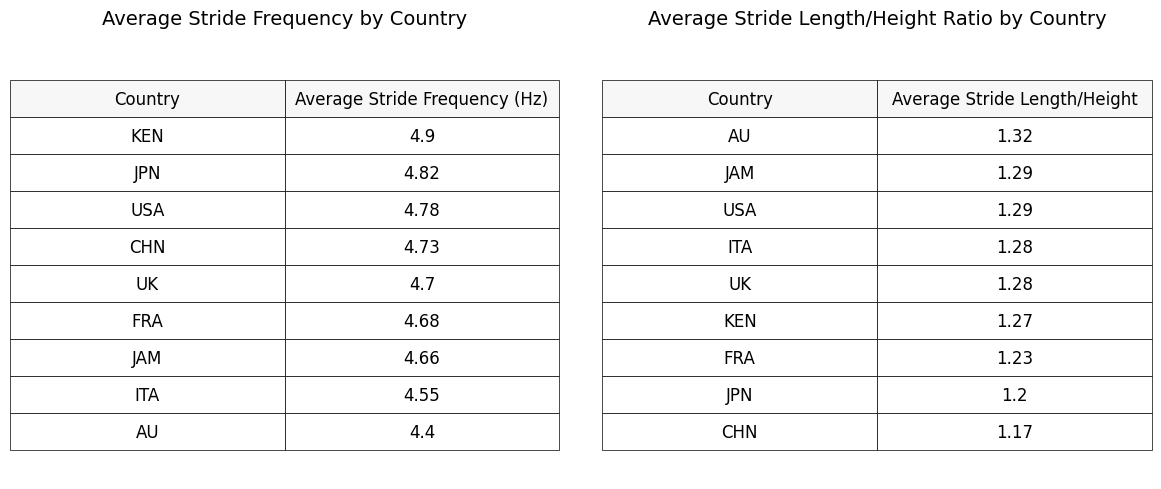

In [5]:
# 計算各國頂尖選手「步頻」的平均值，並按平均值排序
country_mean_frequency_desc = df.groupby('country')['stride_frequency_hz'].mean().round(2).sort_values(ascending=False)

# 計算各國頂尖選手「步幅身高比」的平均值，並按平均值排序
country_mean_stride_length_per_height = df.groupby('country')['stride_length_per_height'].mean().round(2).sort_values(ascending=False)

# 繪製步頻平均值表格
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  # 左側表格
plt.axis('off')
table1 = plt.table(cellText=country_mean_frequency_desc.reset_index().values,
                  colLabels=['Country', 'Average Stride Frequency (Hz)'],
                  loc='center',
                  cellLoc='center',
                  colColours=['#f7f7f7']*2)
table1.auto_set_font_size(False)
table1.set_fontsize(12)
table1.scale(1.5, 2)
plt.title('Average Stride Frequency by Country', pad=20, fontsize=14)

# 繪製步幅身高比平均值表格
plt.subplot(1, 2, 2)  # 右側表格
plt.axis('off')
table2 = plt.table(cellText=country_mean_stride_length_per_height.reset_index().values,
                  colLabels=['Country', 'Average Stride Length/Height'],
                  loc='center',
                  cellLoc='center',
                  colColours=['#f7f7f7']*2)
table2.auto_set_font_size(False)
table2.set_fontsize(12)
table2.scale(1.5, 2)
plt.title('Average Stride Length/Height Ratio by Country', pad=20, fontsize=14)

plt.tight_layout()
plt.show()


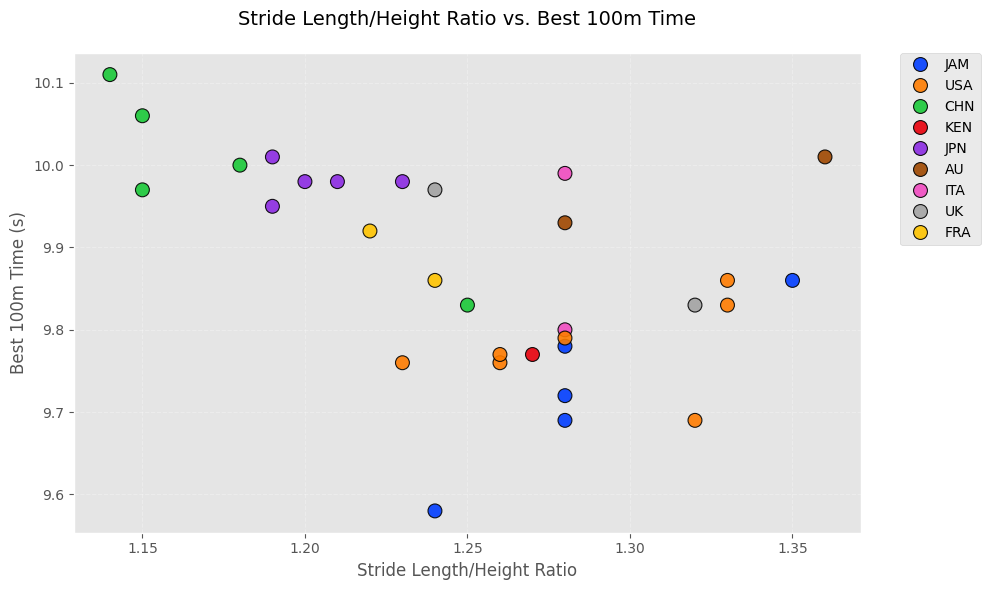


步幅身高比與最佳成績的相關性分析:
皮爾森係數: -0.49
P值: 0.0049
結果具有統計顯著性 (p < 0.05)
呈現負相關 - 步幅身高比越大，成績越好(時間越短)


In [40]:
# 繪製一個散點圖，用來分析步幅身高比與最佳成績的相關性
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stride_length_per_height', y='best_time', data=df, 
                hue='country', palette='bright', s=100, alpha=0.9, edgecolor='black')
plt.title('Stride Length/Height Ratio vs. Best 100m Time', 
          fontsize=14, pad=20)
plt.xlabel('Stride Length/Height Ratio', fontsize=12)
plt.ylabel('Best 100m Time (s)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

# 計算步幅身高比與最佳成績的皮爾森係數與p值
corr, p_value = pearsonr(df['stride_length_per_height'], df['best_time'])


# 呈現統計結果
print("\n步幅身高比與最佳成績的相關性分析:")
print(f"皮爾森係數: {corr:.2f}")
print(f"P值: {p_value:.4f}")

if p_value < 0.05:
    print("結果具有統計顯著性 (p < 0.05)")
    if corr > 0:
        print("呈現正相關 - 步幅身高比越大，成績越差(時間越長)")
    else:
        print("呈現負相關 - 步幅身高比越大，成績越好(時間越短)")
else:
    print("結果不具統計顯著性 (p >= 0.05)")


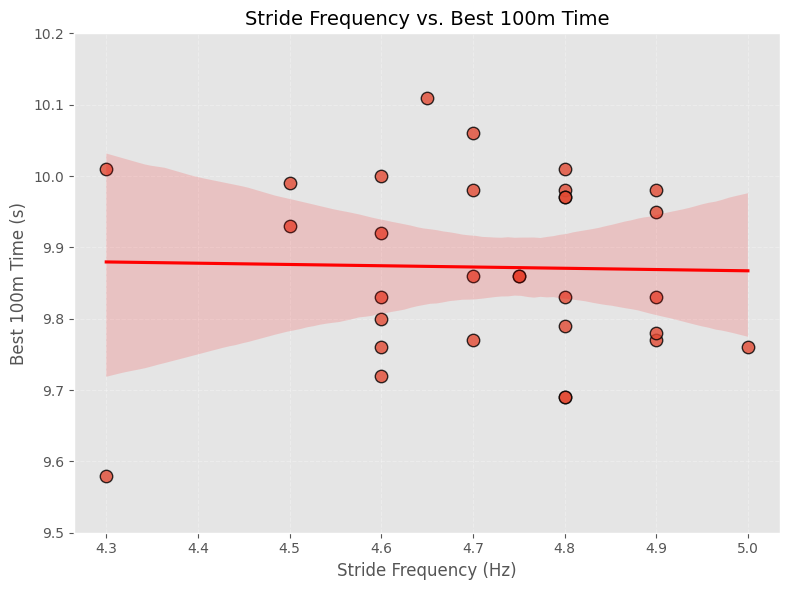


步頻與最佳成績的相關性分析:
皮爾森係數: -0.024
P值: 0.900
結果不具統計顯著性 (p >= 0.05)


In [41]:
# 使用散佈圖觀察選手步頻與最佳成績的關係，並加入回歸線
plt.figure(figsize=(8, 6))
sns.regplot(x='stride_frequency_hz', y='best_time', data=data, 
            scatter_kws={'s': 80, 'alpha': 0.8, 'edgecolor': 'black'},
            line_kws={'color': 'red'})
plt.title('Stride Frequency vs. Best 100m Time', fontsize=14)
plt.xlabel('Stride Frequency (Hz)', fontsize=12)
plt.ylabel('Best 100m Time (s)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
# 設定y軸範圍為10.20秒到9.5秒
plt.ylim(9.5, 10.2) 
plt.tight_layout()
plt.show()

# 計算步頻與最佳成績的相關性
correlation, p_value = pearsonr(df['stride_frequency_hz'], df['best_time'])

print("\n步頻與最佳成績的相關性分析:")
print(f"皮爾森係數: {correlation:.3f}")
print(f"P值: {p_value:.3f}")

# 呈現統計結果
if p_value < 0.05:
    print("結果具有統計顯著性 (p < 0.05)")
    if correlation < 0:
        print("呈現負相關 - 步頻越高，成績越好(時間越短)")
    else:
        print("呈現正相關 - 步頻越高，成績越差(時間越長)") 
else:
    print("結果不具統計顯著性 (p >= 0.05)")

